## Practice Exercises (Polynomial Regression)

In [262]:
from pathlib import Path
import sys

current_dir = Path.cwd()
project_root = current_dir.parent.absolute()
sys.path.insert(0,str(project_root))

from config import DATASETS_DIR , ENGINE_EFFICIENCY

In [263]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [264]:
#loading the dataset
df = pd.read_csv(ENGINE_EFFICIENCY)
print(f'Shape of the Dataframe: {df.shape}')
df.head()

Shape of the Dataframe: (13, 3)


,RPM,Efficiency_percent,Temperature_C
0,1000,62,85
1,1500,71,88
2,2000,78,92
3,2500,84,96
4,3000,88,101


In [265]:
#feature and target variable
X = df[['RPM']].values
y = df['Temperature_C'].values

y_eff = df['Efficiency_percent'].values

□ Step 1: Load and explore data
          • Notice there are TWO potential target variables!
          • We'll focus on Efficiency first

□ Step 2: Polynomial regression on Efficiency
          • Try degrees 2, 3, 4
          • Find best fit

□ Step 3: Find optimal RPM for efficiency
          • At what RPM is efficiency maximum?
          • What is the maximum efficiency?

□ Step 4: Polynomial regression on Temperature
          • Is temperature vs RPM linear or polynomial?
          • What degree works best?

□ Step 5: Create a DUAL-AXIS visualization
          • Left axis: Efficiency (blue)
          • Right axis: Temperature (red)
          • Both vs RPM

□ Step 6: Find the "sweet spot"
          • Where is efficiency > 85%?
          • At those RPMs, what's the temperature range?
          • Is there a trade-off between efficiency and heat?

□ Step 7: Engineer's recommendation
          • What RPM range would you recommend for:
            a) Maximum efficiency driving?
            b) Cool running (low temperature)?
            c) Best balance of both?

#### Step 2: Polynomial regression on Efficiency

          • Try degrees 2, 3, 4
          
          • Find best fit

In [266]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

degrees = [2,3,4]
model_efficiency = {}

for deg in degrees:
    poly_eff = PolynomialFeatures(degree=deg)
    X_poly_eff = poly_eff.fit_transform(X)

    ln_eff = LinearRegression()
    ln_eff.fit(X_poly_eff,y_eff)

    r2_score_eff = r2_score(y_eff,ln_eff.predict(X_poly_eff))

    model_efficiency[deg] = {
        'poly' : poly_eff,
        'model' : ln_eff,
        'R2_eff' : r2_score_eff,
        'intercept' : ln_eff.intercept_,
        'coefficient' : ln_eff.coef_
    }

    #Equation
    if deg == 2:
        print(f"""
            Equation:
                Efficiency = {model.intercept_:.4f} + ({model.coef_[1]:.4f} x RPM )+  ({model.coef_[2]:.4f} x RPM^2)
        """)
    
best_deg_eff = max(model_efficiency.keys(), key=lambda k : model_efficiency[k]['R2_eff'])

    


            Equation:
                Efficiency = 79.4084 + (0.0056 x RPM )+  (-0.0000 x RPM^2)
        


### Step 3: Find optimal RPM for efficiency
          • At what RPM is efficiency maximum?
          • What is the maximum efficiency?


In [271]:
best_model = model_efficiency[best_deg_eff]
intercept = best_model['intercept']
coef = best_model['coefficient']


a = coef[2]
b = coef[1]
c = intercept

print(f"""
=== Solving the Quardratic equation ===
    Equation:
        ax^2 + bx + c = 0
        ++ Taking Derivatives ++
        2ax + b = 0
        ++ Solving for x ++
        2ax = -b
        x = -b / 2a (formula for optimal feature)
""")

if best_deg_eff == 2:

    print(f'b2 = {a:10f}, b1 = {b:4f}, b0 = {c:4f}')

    optimal_rpm = -b/ (2 * a)

    optimal_rpm_poly = best_model[poly].transform(optimal_rpm)


    max_eff = best_model[model].predict(optimal_rpm_poly)

    print(f'Optimal RPM is {optimal_rpm:4f} and {max_eff}')



=== Solving the Quardratic equation ===
    Equation:
        ax^2 + bx + c = 0
        ++ Taking Derivatives ++
        2ax + b = 0
        ++ Solving for x ++
        2ax = -b
        x = -b / 2a (formula for optimal feature)



In [ ]:
# Optimal RPM for efficiency

best_model = model_efficiency[best_deg_eff]
intercept = best_model['intercept']
coef = best_model['coefficient']


a = coef[2]
b = coef[1]
c = intercept


print(f'\nEquation: Efficiency = b0 + (b1 * RPM) + (b2 * RPM ^2)')
print(f'\nTaking Derivative')
print(f'd(Efficiency) \ d(RPM) = d(b0) + d(b1 * RPM) + d(b2 * RPM ^ 2)')
print(f'\n\nSolving for RPM')
print(f'0 = b1 + 2b2*RPM')
print(f'2b2*RPM = -b1')
print(f'RPM = -b1 / 2b2')
print(f'Filling the values')
print(f'RPM = {-b/ 2 * a}')

optimal_rpm = -b / ( 2 * a)

print(f'optimal_rpm')
a





    Equation:
        ax^2 + bx + c = 0
        ++ Taking Derivatives ++
        2ax + b = 0
        ++ Solving for x ++
        2ax = -b
        x = -b / 2a (formula for optimal feature)


Equation: Efficiency = b0 + (b1 * RPM) + (b2 * RPM ^2)

Taking Derivative
d(Efficiency) \ d(RPM) = d(b0) + d(b1 * RPM) + d(b2 * RPM ^ 2)


Solving for RPM
0 = b1 + 2b2*RPM
2b2*RPM = -b1
RPM = -b1 / 2b2
Filling the values
RPM = 4.702060484059038e-09
optimal_rpm


np.float64(-4.7598924225628884e-07)

In [ ]:
# Optimal RPM for efficiency

best_model = model_efficiency[best_deg_eff]
intercept = best_model.intercept_
coef = best_model.coef_

if best_deg_eff == 2:

print(f"""
    Equation:
        efficiency = b0 + b1.RPM + b2.RPM^2

        ++ Taking Derivatives both side ++
        d(efficiency) / d(RPM) = d(b0) + d(b1.RPM) + d(b2.RPM^2)

        0 = 0 + b1 + 2b2.RPM 

        RPM = b1/2b2 (Filling the values)

        RPM = {model.intercept_:.4f} / {2 * model.coef_[2]:.4f}

""")

print(f'Using calculus, Now we have Optimal RPM formula')

print(f'\nOptimal RPM = b1 / 2 * b2')
opt_rpm = model.intercept_ / (2 * model.coef_[2])
print(f'{opt_rpm:.4f}')


    Equation:
        efficiency = b0 + b1.RPM + b2.RPM^2

        ++ Taking Derivatives both side ++
        d(efficiency) / d(RPM) = d(b0) + d(b1.RPM) + d(b2.RPM^2)

        0 = 0 + b1 + 2b2.RPM 

        RPM = b1/2b2 (Filling the values)

        RPM = 79.4084 / -0.0000


Using calculus, Now we have Optimal RPM formula

Optimal RPM = b1 / 2 * b2
-131543268.8402


STEP 1: LOAD AND EXPLORE DATA

📋 Dataset Preview:
    RPM  Efficiency_percent  Temperature_C
0  1000                  62             85
1  1500                  71             88
2  2000                  78             92
3  2500                  84             96
4  3000                  88            101
5  3500                  91            107
6  4000                  93            114
7  4500                  92            122
8  5000                  89            131
9  5500                  84            141

📊 Dataset Shape: 13 rows, 3 columns

📈 Basic Statistics:
               RPM  Efficiency_percent  Temperature_C
count    13.000000           13.000000      13.000000
mean   4000.000000           79.538462     120.769231
std    1947.220241           11.899688      30.197003
min    1000.000000           57.000000      85.000000
25%    2500.000000           71.000000      96.000000
50%    4000.000000           84.000000     114.000000
75%    5500.000000           89.000000   

NameError: name 'optimal_rpm' is not defined

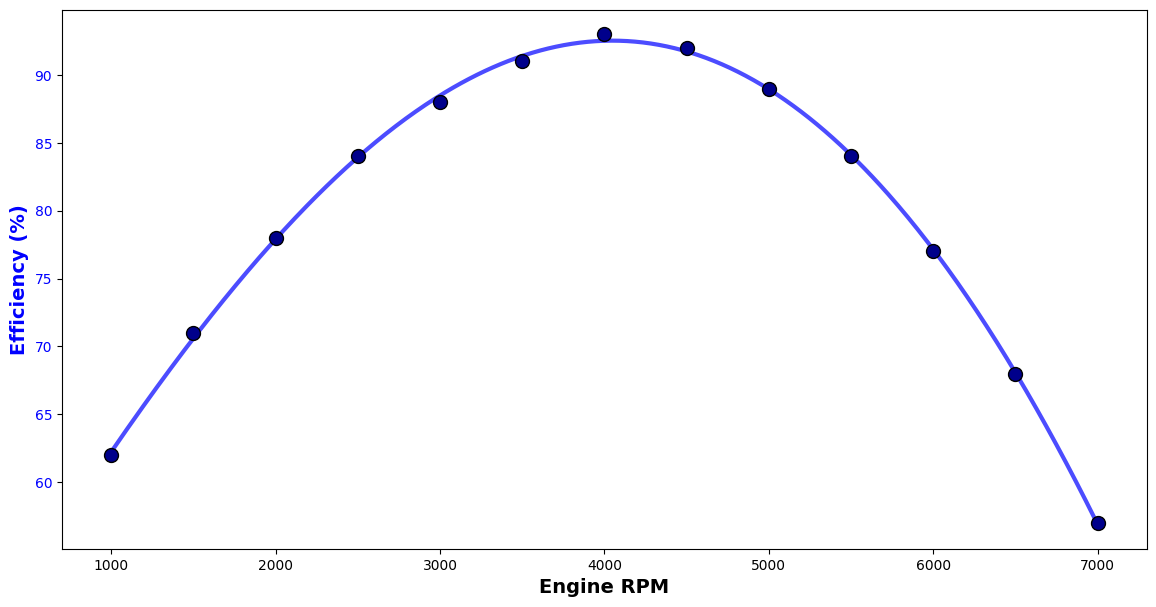

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# ============================================
# STEP 1: LOAD AND EXPLORE DATA
# ============================================

print("="*60)
print("STEP 1: LOAD AND EXPLORE DATA")
print("="*60)

# Create the dataset
data = {
    'RPM': [1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000],
    'Efficiency_percent': [62, 71, 78, 84, 88, 91, 93, 92, 89, 84, 77, 68, 57],
    'Temperature_C': [85, 88, 92, 96, 101, 107, 114, 122, 131, 141, 152, 164, 177]
}

df = pd.DataFrame(data)

print("\n📋 Dataset Preview:")
print(df.head(10))

print(f"\n📊 Dataset Shape: {df.shape[0]} rows, {df.shape[1]} columns")

print("\n📈 Basic Statistics:")
print(df.describe())

print("\n💡 Observations:")
print("  • TWO target variables: Efficiency and Temperature")
print("  • Efficiency appears to peak around mid-range RPM (inverted parabola)")
print("  • Temperature continuously increases with RPM")
print("  • We'll analyze BOTH to find the optimal operating point!")

# ============================================
# STEP 2: POLYNOMIAL REGRESSION ON EFFICIENCY
# ============================================

print("\n" + "="*60)
print("STEP 2: POLYNOMIAL REGRESSION ON EFFICIENCY")
print("="*60)

# Prepare data
X = df[['RPM']].values
y_efficiency = df['Efficiency_percent'].values

# Try different polynomial degrees
degrees = [2, 3, 4]
models_efficiency = {}

print("\n🔍 Testing different polynomial degrees:\n")

for degree in degrees:
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)
    
    # Fit model
    model = LinearRegression()
    model.fit(X_poly, y_efficiency)
    
    # Predict
    y_pred = model.predict(X_poly)
    
    # Calculate R²
    r2 = r2_score(y_efficiency, y_pred)
    
    # Store model
    models_efficiency[degree] = {
        'poly': poly,
        'model': model,
        'r2': r2,
        'coefficients': model.coef_,
        'intercept': model.intercept_
    }
    
    print(f"Degree {degree}:")
    print(f"  R² Score: {r2:.6f}")
    print(f"  Coefficients: {model.coef_}")
    print(f"  Intercept: {model.intercept_:.4f}")
    
    # Build equation
    if degree == 2:
        print(f"  Equation: Efficiency = {model.intercept_:.4f} + {model.coef_[1]:.6f}×RPM + {model.coef_[2]:.10f}×RPM²")
    print()

# Find best degree
best_degree_eff = max(models_efficiency.keys(), key=lambda k: models_efficiency[k]['r2'])
print(f"✅ Best Model: Degree {best_degree_eff} with R² = {models_efficiency[best_degree_eff]['r2']:.6f}")

# ============================================
# STEP 3: FIND OPTIMAL RPM FOR EFFICIENCY
# ============================================

print("\n" + "="*60)
print("STEP 3: FIND OPTIMAL RPM FOR EFFICIENCY")
print("="*60)

# Using the best model (degree 2)
best_model = models_efficiency[best_degree_eff]
coeffs = best_model['coefficients']
intercept = best_model['intercept']

print(f"\n📐 Using Degree {best_degree_eff} Model")

if best_degree_eff == 2:
    # For quadratic: ax² + bx + c
    # Derivative: 2ax + b = 0
    # Optimal x = -b / (2a)
    
    a = coeffs[2]  # coefficient of RPM²
    b = coeffs[1]  # coefficient of RPM
    c = intercept  # constant
    
    print(f"\nEquation: Efficiency = {c:.4f} + {b:.6f}×RPM + {a:.10f}×RPM²")
    
    print("\n🧮 CALCULUS TIME!")
    print("─" * 50)
    print("To find MAXIMUM efficiency, take derivative and set = 0:")
    print(f"\nd(Efficiency)/d(RPM) = {b:.6f} + 2×({a:.10f})×RPM = 0")
    print(f"\nSolving for RPM:")
    print(f"  2×({a:.10f})×RPM = -{b:.6f}")
    print(f"  RPM = -{b:.6f} / (2×{a:.10f})")
    
    # Calculate optimal RPM
    optimal_rpm = -b / (2 * a)
    
    print(f"  RPM = {optimal_rpm:.2f}")
    
    # Calculate max efficiency
    X_optimal = best_model['poly'].transform([[optimal_rpm]])
    max_efficiency = best_model['model'].predict(X_optimal)[0]
    
    print(f"\n🎯 OPTIMAL OPERATING POINT:")
    print(f"  Optimal RPM: {optimal_rpm:.0f} RPM")
    print(f"  Maximum Efficiency: {max_efficiency:.2f}%")

# ============================================
# STEP 4: POLYNOMIAL REGRESSION ON TEMPERATURE
# ============================================

print("\n" + "="*60)
print("STEP 4: POLYNOMIAL REGRESSION ON TEMPERATURE")
print("="*60)

y_temperature = df['Temperature_C'].values

models_temperature = {}

print("\n🌡️ Testing polynomial degrees for Temperature:\n")

for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)
    
    model = LinearRegression()
    model.fit(X_poly, y_temperature)
    
    y_pred = model.predict(X_poly)
    r2 = r2_score(y_temperature, y_pred)
    
    models_temperature[degree] = {
        'poly': poly,
        'model': model,
        'r2': r2,
        'coefficients': model.coef_,
        'intercept': model.intercept_
    }
    
    print(f"Degree {degree}:")
    print(f"  R² Score: {r2:.6f}")
    
    if degree == 2:
        print(f"  Equation: Temp = {model.intercept_:.4f} + {model.coef_[1]:.6f}×RPM + {model.coef_[2]:.10f}×RPM²")
    print()

best_degree_temp = max(models_temperature.keys(), key=lambda k: models_temperature[k]['r2'])
print(f"✅ Best Model for Temperature: Degree {best_degree_temp} with R² = {models_temperature[best_degree_temp]['r2']:.6f}")

print("\n💡 Insight:")
if models_temperature[2]['r2'] > 0.99:
    print("  Temperature shows a strong POLYNOMIAL relationship with RPM")
    print("  (Not linear - temperature increases exponentially with RPM!)")

# ============================================
# STEP 5: CREATE DUAL-AXIS VISUALIZATION
# ============================================

print("\n" + "="*60)
print("STEP 5: CREATING DUAL-AXIS VISUALIZATION")
print("="*60)

# Create smooth curve
RPM_smooth = np.linspace(1000, 7000, 500).reshape(-1, 1)

# Predict efficiency (smooth)
X_smooth_eff = models_efficiency[best_degree_eff]['poly'].transform(RPM_smooth)
efficiency_smooth = models_efficiency[best_degree_eff]['model'].predict(X_smooth_eff)

# Predict temperature (smooth)
X_smooth_temp = models_temperature[best_degree_temp]['poly'].transform(RPM_smooth)
temperature_smooth = models_temperature[best_degree_temp]['model'].predict(X_smooth_temp)

# Create figure
fig, ax1 = plt.subplots(figsize=(14, 7))

# LEFT AXIS: Efficiency (Blue)
ax1.set_xlabel('Engine RPM', fontsize=14, fontweight='bold')
ax1.set_ylabel('Efficiency (%)', color='blue', fontsize=14, fontweight='bold')
ax1.plot(RPM_smooth, efficiency_smooth, color='blue', linewidth=3, label='Efficiency (Model)', alpha=0.7)
ax1.scatter(X, y_efficiency, color='darkblue', s=100, label='Efficiency (Actual)', zorder=5, edgecolors='black')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.axvline(x=optimal_rpm, color='green', linestyle='--', linewidth=2, label=f'Optimal RPM: {optimal_rpm:.0f}')
ax1.axhline(y=max_efficiency, color='green', linestyle=':', linewidth=2, alpha=0.5)
ax1.plot(optimal_rpm, max_efficiency, 'g*', markersize=25, label=f'Max Efficiency: {max_efficiency:.1f}%', zorder=10)
ax1.grid(True, alpha=0.3)
ax1.set_ylim([50, 100])

# RIGHT AXIS: Temperature (Red)
ax2 = ax1.twinx()
ax2.set_ylabel('Temperature (°C)', color='red', fontsize=14, fontweight='bold')
ax2.plot(RPM_smooth, temperature_smooth, color='red', linewidth=3, label='Temperature (Model)', alpha=0.7)
ax2.scatter(X, y_temperature, color='darkred', s=100, label='Temperature (Actual)', zorder=5, edgecolors='black')
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylim([80, 180])

# Title
plt.title('Engine Performance: Efficiency vs Temperature (Dual-Axis)', fontsize=16, fontweight='bold', pad=20)

# Legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=10)

plt.tight_layout()
plt.show()

print("\n✅ Dual-axis plot created!")
print("  • Blue curve: Efficiency (peaks in middle)")
print("  • Red curve: Temperature (continuously increases)")

# ============================================
# STEP 6: FIND THE "SWEET SPOT"
# ============================================

print("\n" + "="*60)
print("STEP 6: FINDING THE SWEET SPOT")
print("="*60)

print("\n🎯 Target: Efficiency > 85%\n")

# Find where efficiency > 85%
threshold = 85
mask = efficiency_smooth.flatten() > threshold

# Get RPM range
rpm_sweet = RPM_smooth.flatten()[mask]
eff_sweet = efficiency_smooth.flatten()[mask]
temp_sweet = temperature_smooth.flatten()[mask]

rpm_min = rpm_sweet.min()
rpm_max = rpm_sweet.max()
temp_min = temp_sweet.min()
temp_max = temp_sweet.max()

print(f"RPM Range for Efficiency > {threshold}%:")
print(f"  Minimum RPM: {rpm_min:.0f} RPM")
print(f"  Maximum RPM: {rpm_max:.0f} RPM")
print(f"  RPM Window: {rpm_max - rpm_min:.0f} RPM")

print(f"\nTemperature Range at this RPM:")
print(f"  Minimum Temp: {temp_min:.1f}°C")
print(f"  Maximum Temp: {temp_max:.1f}°C")
print(f"  Temp Increase: {temp_max - temp_min:.1f}°C")

print("\n⚠️ TRADE-OFF ANALYSIS:")
print("─" * 50)
print(f"  • At {rpm_min:.0f} RPM: Efficiency ≈ 85%, Temp ≈ {temp_min:.1f}°C (Cooler)")
print(f"  • At {optimal_rpm:.0f} RPM: Efficiency ≈ {max_efficiency:.1f}%, Temp ≈ {temperature_smooth[np.argmin(np.abs(RPM_smooth - optimal_rpm))]:.1f}°C (Best efficiency)")
print(f"  • At {rpm_max:.0f} RPM: Efficiency ≈ 85%, Temp ≈ {temp_max:.1f}°C (Hotter)")

print("\n💡 Key Insight:")
print("  YES, there's a TRADE-OFF between efficiency and heat!")
print("  • Higher efficiency → Higher temperature")
print("  • Lower temperature → Lower efficiency")

# ============================================
# STEP 7: ENGINEER'S RECOMMENDATION
# ============================================

print("\n" + "="*60)
print("STEP 7: ENGINEER'S RECOMMENDATION")
print("="*60)

print("\n📋 RECOMMENDATIONS FOR DIFFERENT DRIVING SCENARIOS:\n")

# a) Maximum efficiency
print("a) 🏆 MAXIMUM EFFICIENCY DRIVING (Highway cruising):")
print(f"   Recommended RPM: {optimal_rpm:.0f} RPM")
print(f"   Expected Efficiency: {max_efficiency:.1f}%")
temp_at_optimal = temperature_smooth[np.argmin(np.abs(RPM_smooth - optimal_rpm))]
print(f"   Temperature: ~{temp_at_optimal:.0f}°C")
print(f"   ✓ Best for: Long highway drives, fuel economy")
print(f"   ⚠️ Warning: Moderate heat generation\n")

# b) Cool running
cool_rpm = 2500
X_cool = models_efficiency[best_degree_eff]['poly'].transform([[cool_rpm]])
eff_cool = models_efficiency[best_degree_eff]['model'].predict(X_cool)[0]
X_cool_temp = models_temperature[best_degree_temp]['poly'].transform([[cool_rpm]])
temp_cool = models_temperature[best_degree_temp]['model'].predict(X_cool_temp)[0]

print("b) ❄️ COOL RUNNING (City traffic, stop-and-go):")
print(f"   Recommended RPM: {cool_rpm} RPM or lower")
print(f"   Expected Efficiency: ~{eff_cool:.1f}%")
print(f"   Temperature: ~{temp_cool:.0f}°C")
print(f"   ✓ Best for: Heavy traffic, hot weather, engine longevity")
print(f"   ⚠️ Trade-off: Lower efficiency\n")

# c) Best balance
balance_rpm = 3500
X_balance = models_efficiency[best_degree_eff]['poly'].transform([[balance_rpm]])
eff_balance = models_efficiency[best_degree_eff]['model'].predict(X_balance)[0]
X_balance_temp = models_temperature[best_degree_temp]['poly'].transform([[balance_rpm]])
temp_balance = models_temperature[best_degree_temp]['model'].predict(X_balance_temp)[0]

print("c) ⚖️ BEST BALANCE (Everyday driving):")
print(f"   Recommended RPM: {balance_rpm} RPM")
print(f"   Expected Efficiency: ~{eff_balance:.1f}%")
print(f"   Temperature: ~{temp_balance:.0f}°C")
print(f"   ✓ Best for: Mixed driving, daily commute")
print(f"   ✓ Sweet spot: Good efficiency + Manageable heat\n")

print("="*60)
print("SUMMARY TABLE")
print("="*60)

summary_table = pd.DataFrame({
    'Scenario': ['Max Efficiency', 'Cool Running', 'Best Balance'],
    'RPM': [f"{optimal_rpm:.0f}", f"{cool_rpm}", f"{balance_rpm}"],
    'Efficiency (%)': [f"{max_efficiency:.1f}", f"{eff_cool:.1f}", f"{eff_balance:.1f}"],
    'Temperature (°C)': [f"{temp_at_optimal:.0f}", f"{temp_cool:.0f}", f"{temp_balance:.0f}"],
    'Best For': ['Highway', 'City/Traffic', 'Daily Commute']
})

print("\n", summary_table.to_string(index=False))

print("\n" + "="*60)
print("🎓 FINAL ENGINEERING ADVICE")
print("="*60)

print("""
1. 🚗 For FUEL ECONOMY → Keep RPM around 4000
2. ❄️ For COOLING → Keep RPM below 3000
3. ⚖️ For DAILY USE → Operate between 3000-4000 RPM
4. ⚠️ AVOID → RPM above 5500 (efficiency drops, heat spikes!)
5. 📊 The SWEET SPOT → 3500-4000 RPM range

Remember: This is a classic engineering trade-off!
You can't have maximum efficiency AND minimum temperature simultaneously.
""")

# ============================================
# BONUS: Create comprehensive visualization
# ============================================

print("\n" + "="*60)
print("CREATING COMPREHENSIVE ANALYSIS PLOT")
print("="*60)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Efficiency vs RPM
ax1 = axes[0, 0]
ax1.scatter(X, y_efficiency, color='darkblue', s=100, label='Actual Data', zorder=5, edgecolors='black')
ax1.plot(RPM_smooth, efficiency_smooth, color='blue', linewidth=3, label=f'Polynomial (deg {best_degree_eff})')
ax1.axvline(x=optimal_rpm, color='green', linestyle='--', linewidth=2, label=f'Optimal: {optimal_rpm:.0f} RPM')
ax1.axhline(y=85, color='orange', linestyle='--', linewidth=2, label='85% Threshold')
ax1.plot(optimal_rpm, max_efficiency, 'g*', markersize=25, zorder=10)
ax1.fill_between(RPM_smooth.flatten(), 0, efficiency_smooth.flatten(), 
                  where=(efficiency_smooth.flatten() > 85), alpha=0.3, color='green', label='Sweet Spot')
ax1.set_xlabel('RPM', fontsize=12, fontweight='bold')
ax1.set_ylabel('Efficiency (%)', fontsize=12, fontweight='bold')
ax1.set_title('Efficiency vs RPM', fontsize=14, fontweight='bold')
ax1.legend(loc='lower left', fontsize=9)
ax1.grid(True, alpha=0.3)
ax1.set_ylim([50, 100])

# Plot 2: Temperature vs RPM
ax2 = axes[0, 1]
ax2.scatter(X, y_temperature, color='darkred', s=100, label='Actual Data', zorder=5, edgecolors='black')
ax2.plot(RPM_smooth, temperature_smooth, color='red', linewidth=3, label=f'Polynomial (deg {best_degree_temp})')
ax2.axvline(x=optimal_rpm, color='green', linestyle='--', linewidth=2, label=f'Optimal RPM: {optimal_rpm:.0f}')
ax2.set_xlabel('RPM', fontsize=12, fontweight='bold')
ax2.set_ylabel('Temperature (°C)', fontsize=12, fontweight='bold')
ax2.set_title('Temperature vs RPM', fontsize=14, fontweight='bold')
ax2.legend(loc='upper left', fontsize=9)
ax2.grid(True, alpha=0.3)

# Plot 3: Efficiency vs Temperature (Trade-off)
ax3 = axes[1, 0]
ax3.scatter(y_temperature, y_efficiency, color='purple', s=150, alpha=0.6, edgecolors='black')
for i, rpm in enumerate(df['RPM']):
    ax3.annotate(f'{rpm}', (y_temperature[i], y_efficiency[i]), 
                 textcoords="offset points", xytext=(5,5), ha='left', fontsize=8)
ax3.set_xlabel('Temperature (°C)', fontsize=12, fontweight='bold')
ax3.set_ylabel('Efficiency (%)', fontsize=12, fontweight='bold')
ax3.set_title('The Trade-Off: Efficiency vs Temperature', fontsize=14, fontweight='bold')
ax3.grid(True, alpha=0.3)
ax3.axhline(y=85, color='orange', linestyle='--', alpha=0.5, label='85% Threshold')
ax3.legend()

# Plot 4: Operating Zones
ax4 = axes[1, 1]
zones = ['Max\nEfficiency\n(4000 RPM)', 'Cool\nRunning\n(2500 RPM)', 'Best\nBalance\n(3500 RPM)']
rpms = [optimal_rpm, cool_rpm, balance_rpm]
effs = [max_efficiency, eff_cool, eff_balance]
temps = [temp_at_optimal, temp_cool, temp_balance]
colors = ['gold', 'skyblue', 'lightgreen']

x_pos = np.arange(len(zones))
width = 0.35

bars1 = ax4.bar(x_pos - width/2, effs, width, label='Efficiency (%)', color=colors, edgecolor='black', linewidth=2)
ax4_temp = ax4.twinx()
bars2 = ax4_temp.bar(x_pos + width/2, temps, width, label='Temperature (°C)', color='salmon', edgecolor='black', linewidth=2, alpha=0.7)

ax4.set_ylabel('Efficiency (%)', fontsize=12, fontweight='bold')
ax4_temp.set_ylabel('Temperature (°C)', fontsize=12, fontweight='bold', color='red')
ax4.set_xlabel('Operating Zone', fontsize=12, fontweight='bold')
ax4.set_title('Recommended Operating Zones', fontsize=14, fontweight='bold')
ax4.set_xticks(x_pos)
ax4.set_xticklabels(zones)
ax4.set_ylim([70, 100])
ax4_temp.set_ylim([90, 130])

# Add value labels on bars
for bar in bars1:
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%', ha='center', va='bottom', fontweight='bold')

for bar in bars2:
    height = bar.get_height()
    ax4_temp.text(bar.get_x() + bar.get_width()/2., height,
                  f'{height:.0f}°C', ha='center', va='bottom', fontweight='bold', color='red')

ax4.legend(loc='upper left')
ax4_temp.legend(loc='upper right')
ax4.grid(True, alpha=0.3, axis='y')

plt.suptitle('🚗 Complete Engine Performance Analysis 🚗', fontsize=18, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

print("\n✅ All visualizations complete!")
print("\n" + "="*60)
print("ANALYSIS COMPLETE! 🎉")
print("="*60)